In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import random_split, DataLoader
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

import numpy as np

# Download CIFAR 10 data form torchvision

In [2]:

train_dataset = torchvision.datasets.CIFAR10('~/datasets/cifar', train=True, download=True)
test_dataset = torchvision.datasets.CIFAR10('~/datasets/cifar', train=False, download=True)


Files already downloaded and verified
Files already downloaded and verified


# Image Contrasting

# Generate a list of contrast adjusted images

In [3]:
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
import torchvision.transforms.functional as F

contrast_factor = 2 #0.3 # 0 gray - 1 original image - 2 increases the contrast by a factor of 2.

def apply_contrast(images, contrast_factor):
    to_tensor = transforms.ToTensor()   
    images_list = [to_tensor(im) for im in images]
    images = torch.stack(images_list)
    contrast_adjusted_images = F.adjust_contrast(images, contrast_factor)
    return np.stack([transforms.ToPILImage()(im) for im in contrast_adjusted_images])

train_contrasted_images = apply_contrast(train_dataset.data, contrast_factor)
test_contrasted_images = apply_contrast(test_dataset.data, contrast_factor)

test_contrasted_images_0_4 = apply_contrast(test_dataset.data, 0.4)
test_contrasted_images_0_6 = apply_contrast(test_dataset.data, 0.6)
test_contrasted_images_2 = apply_contrast(test_dataset.data, 2)

print("Train contrast adjusted images shape")
print(train_contrasted_images.shape)

print("Test contrast adjusted images shape")
print(test_contrasted_images.shape)



Train contrast adjusted images shape
(50000, 32, 32, 3)
Test contrast adjusted images shape
(10000, 32, 32, 3)


# Visualizing generated contrast adjusted images: contrast factor 0.4

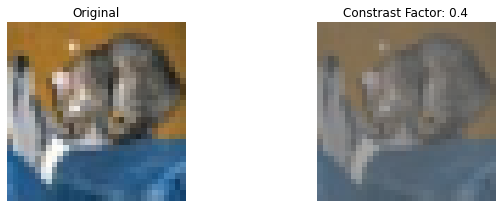

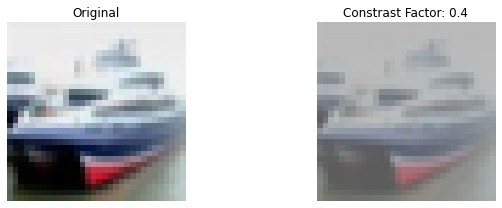

In [4]:
contrast_factor = 0.4
i=0
for constrasted_image in test_contrasted_images_0_4:
    fig = plt.figure(figsize=(10, 3))
    ax1,ax2 = fig.subplots(1,2)
    ax1.imshow(test_dataset.data[i], cmap='gray')
    ax1.set_axis_off()
    ax1.set_title("Original")
    ax2.imshow(constrasted_image, cmap='gray')
    ax2.set_axis_off()
    ax2.set_title("Constrast Factor: "+str(contrast_factor))
    fig.set_tight_layout(True)
    plt.show()
    i +=1
    
    if i==2:
        break
    

# Visualizing generated contrast adjusted images: contrast factor 0.6

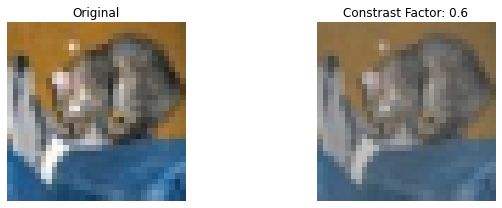

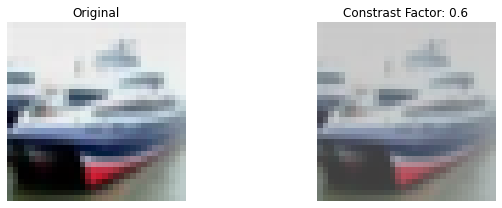

In [5]:
contrast_factor = 0.6
i=0
for constrasted_image in test_contrasted_images_0_6:
    fig = plt.figure(figsize=(10, 3))
    ax1,ax2 = fig.subplots(1,2)
    ax1.imshow(test_dataset.data[i], cmap='gray')
    ax1.set_axis_off()
    ax1.set_title("Original")
    ax2.imshow(constrasted_image, cmap='gray')
    ax2.set_axis_off()
    ax2.set_title("Constrast Factor: "+str(contrast_factor))
    fig.set_tight_layout(True)
    plt.show()
    i +=1
    
    if i==2:
        break

        
        
        

# Visualizing generated contrast adjusted images: contrast factor 2

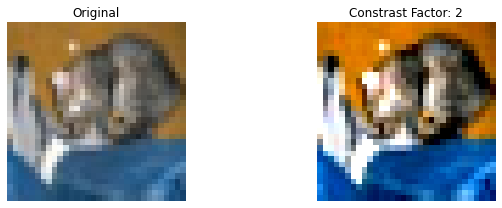

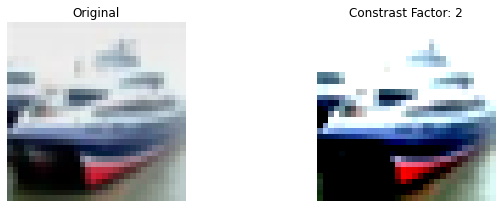

In [6]:
contrast_factor = 2
i=0
for constrasted_image in test_contrasted_images_2:
    fig = plt.figure(figsize=(10, 3))
    ax1,ax2 = fig.subplots(1,2)
    ax1.imshow(test_dataset.data[i], cmap='gray')
    ax1.set_axis_off()
    ax1.set_title("Original")
    ax2.imshow(constrasted_image, cmap='gray')
    ax2.set_axis_off()
    ax2.set_title("Constrast Factor: "+str(contrast_factor))
    fig.set_tight_layout(True)
    plt.show()
    i +=1
    
    if i==2:
        break

# Combining original and contrasted images

In [7]:
original_image_labels = np.zeros(len(train_dataset.data))
contrasted_image_labels = np.ones(len(train_contrasted_images))

test_original_image_labels = np.zeros(len(test_dataset.data))
test_contrasted_image_labels = np.ones(len(test_contrasted_images))

train_original_and_contrasted_images = np.concatenate((train_dataset.data, train_contrasted_images), axis=0)
train_contrast_labels = np.concatenate((original_image_labels, contrasted_image_labels), axis=None)
train_image_labels = np.concatenate((train_dataset.targets, train_dataset.targets), axis=None)

test_original_and_contrasted_images = np.concatenate((test_dataset.data, test_contrasted_images), axis=0)
test_contrast_labels = np.concatenate((test_original_image_labels, test_contrasted_image_labels), axis=None)

# test_contrasted_images_0_1 = apply_contrast(test_dataset.data, 0.1)
# test_contrasted_images_0_5 = apply_contrast(test_dataset.data, 0.5)
# test_contrasted_images_2 = apply_contrast(test_dataset.data, 2)

# combining the 4 different contrasts of images into one set
original_and_3_diff_contrasts_of_images = np.concatenate((test_dataset.data, test_contrasted_images_0_4,
                                                          test_contrasted_images_0_6,test_contrasted_images_2), axis=0)

print("Combined contrasted and original train images shape")
print(train_original_and_contrasted_images.shape)

print("Combined 4 different contrasts of images shape")
print(original_and_3_diff_contrasts_of_images.shape)


Combined contrasted and original train images shape
(100000, 32, 32, 3)
Combined 4 different contrasts of images shape
(40000, 32, 32, 3)


# Extract image features

In [8]:
from image_feature_extractor import Img2Vec

img2vec = Img2Vec()

Z = img2vec.get_vec(train_original_and_contrasted_images)

Z_4 = img2vec.get_vec(original_and_3_diff_contrasts_of_images)

Z_test = img2vec.get_vec(test_original_and_contrasted_images)

# Z_test_original = img2vec.get_vec(test_dataset.data)

# Z_test_contrasted = img2vec.get_vec(test_contrasted_images)


print("Shape of extracted features for combined contrasted and original images")
print(Z.shape)

# print("Shape of extracted features for original test images")
# print(Z_test_original.shape)

# print("Shape of extracted features for contrasted test images")
# print(Z_test_contrasted.shape)

print("Shape of extracted features for combined 4 different contrasts of images")
print(Z_4.shape)


Shape of extracted features for combined contrasted and original images
(100000, 512)
Shape of extracted features for combined 4 different contrasts of images
(40000, 512)


# Obtaining contrast prediction coefficients and prediction accuracy.

In [9]:
# Using sklearn Logistic Regression
from sklearn.linear_model import LogisticRegression


lr_model = LogisticRegression(random_state=0).fit(Z, train_contrast_labels)

contrast_coefficients = lr_model.coef_.reshape(-1,1)
contrast_coefficients = contrast_coefficients / np.linalg.norm(contrast_coefficients)

print("Contrast coefficients shape")
print(contrast_coefficients.shape)

print('Contrast prediction accuracy on training data: ', lr_model.score(Z, train_contrast_labels))

print('Contrast prediction accuracy on test data-rotaed and original combined: ', lr_model.score(Z_test, test_contrast_labels))

    


/software/anaconda3/envs/invariance_env/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Contrast coefficients shape
(512, 1)
Contrast prediction accuracy on training data:  0.94144
Contrast prediction accuracy on test data-rotaed and original combined:  0.93935


# Find L, get F_4 features, plot groups of images that are most similar to each other ( determined by calculating distances of features in F_4 )





Results for lamda  10

Distances for image at index  3842
Sorted distance indeces
[ 3842 23842  8607 13842 28607   847]
Sorted distances
[0.         4.81020633 7.74853625 7.89258382 8.16920112 8.3206812 ]
Images closest to image at index  3842


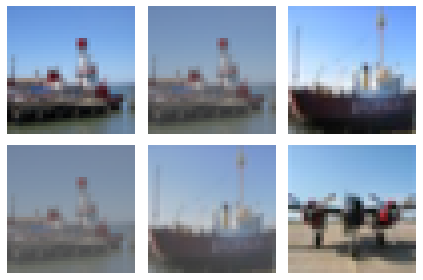

Distances for image at index  3207
Sorted distance indeces
[ 3207 23207  1420 33207 31420  3115]
Sorted distances
[0.         7.31557901 7.88346824 8.40841898 8.41109268 9.18432307]
Images closest to image at index  3207


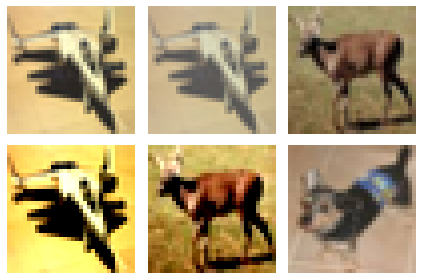

Distances for image at index  3218
Sorted distance indeces
[ 3218 23218 13218 33218  7920 27453]
Sorted distances
[ 0.          6.39222153  9.96900633 10.22245705 10.49099715 11.04090351]
Images closest to image at index  3218


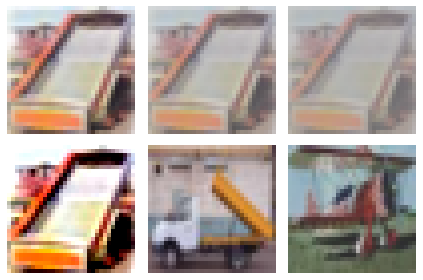

Distances for image at index  381
Sorted distance indeces
[  381 20381 30381 10381  6982  5884]
Sorted distances
[ 0.          7.31650996  7.91516096 10.68520426 10.99717013 11.24052809]
Images closest to image at index  381


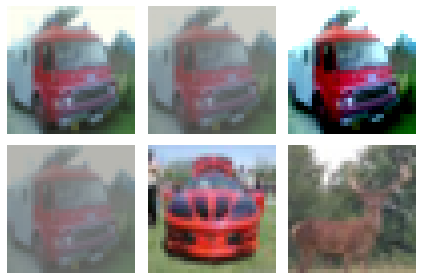

Distances for image at index  1472
Sorted distance indeces
[ 1472 21472 24186   377  4289  1951]
Sorted distances
[0.         7.39553146 7.59311597 7.79494788 7.96589849 8.05859544]
Images closest to image at index  1472


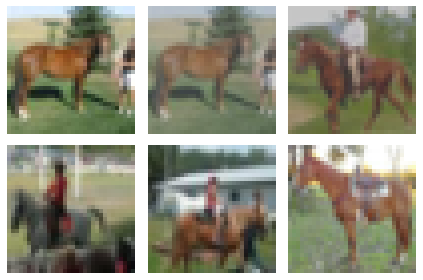





Results for lamda  100

Distances for image at index  2166
Sorted distance indeces
[ 2166 22166 32166 12166 26748  8109]
Sorted distances
[0.         3.46889707 4.22237117 6.34135752 9.09247178 9.35300848]
Images closest to image at index  2166


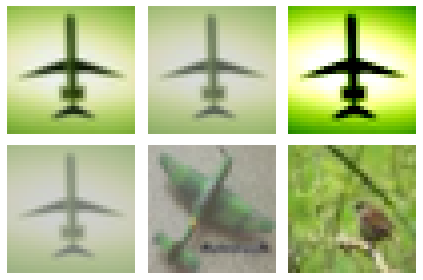

Distances for image at index  410
Sorted distance indeces
[  410 20410 30410 10410  1990 21990]
Sorted distances
[0.         5.40492822 7.69011922 8.15374284 8.45494079 8.73336391]
Images closest to image at index  410


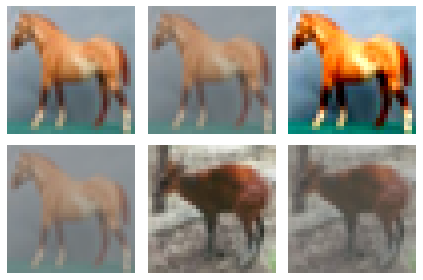

Distances for image at index  2014
Sorted distance indeces
[ 2014 22014 32014 12014 23270  6221]
Sorted distances
[0.         4.35152578 4.89127062 6.41858429 6.44414985 6.47391912]
Images closest to image at index  2014


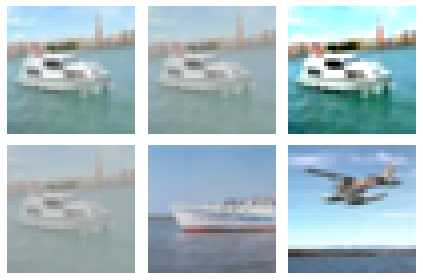

Distances for image at index  2792
Sorted distance indeces
[ 2792 22792 32792 12792 32373  2373]
Sorted distances
[0.         4.61284957 4.69637818 6.5029935  6.69054967 6.78861861]
Images closest to image at index  2792


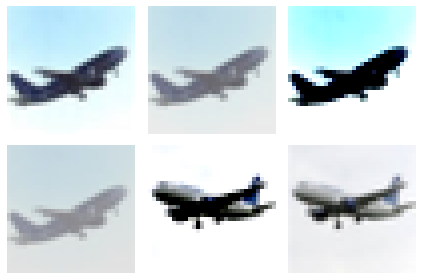

Distances for image at index  3009
Sorted distance indeces
[ 3009 23009 33009  5541 29244   571]
Sorted distances
[0.         4.8734914  5.61112863 7.50687843 7.54369267 7.5564635 ]
Images closest to image at index  3009


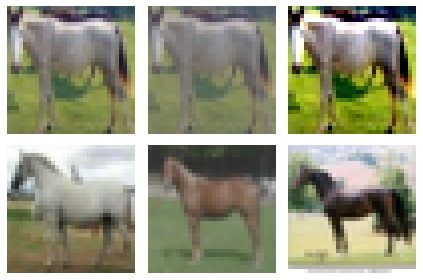





Results for lamda  1000

Distances for image at index  1980
Sorted distance indeces
[ 1980 22671 23164 23174 13151 24425]
Sorted distances
[  0.          76.23383318  90.74242101 219.26526819 449.74008221
 677.87061094]
Images closest to image at index  1980


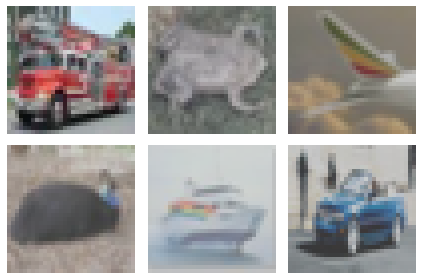

Distances for image at index  3978
Sorted distance indeces
[ 3978 14952 16337  4559 29083 12450]
Sorted distances
[   0.          417.27589327  591.74260423  602.33389402  725.98337286
 1077.40495349]
Images closest to image at index  3978


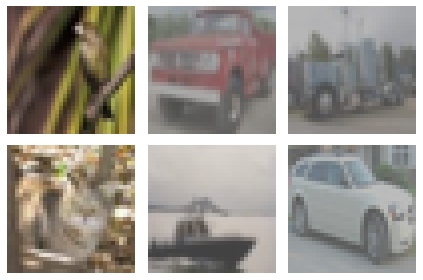

Distances for image at index  2595
Sorted distance indeces
[ 2595 34028  2916 36836 30822  5804]
Sorted distances
[   0.          301.57451901  490.41065262  749.68586419  911.0242727
 1338.10566525]
Images closest to image at index  2595


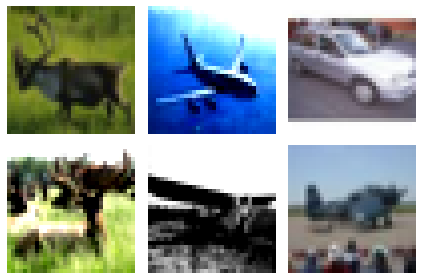

Distances for image at index  2099
Sorted distance indeces
[ 2099 35913 23003 38347  9921 22504]
Sorted distances
[   0.          127.82381493  257.99301158  346.3076475   358.50539778
 1304.34591076]
Images closest to image at index  2099


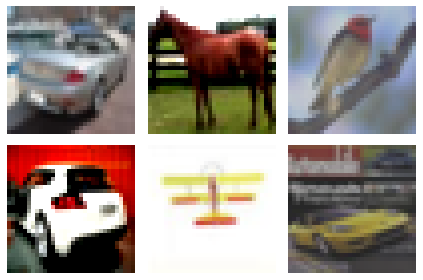

Distances for image at index  3835
Sorted distance indeces
[ 3835 30167 18083  6815 27144 21015]
Sorted distances
[  0.         145.78517312 178.48153935 293.52216239 361.17287632
 540.96940021]
Images closest to image at index  3835


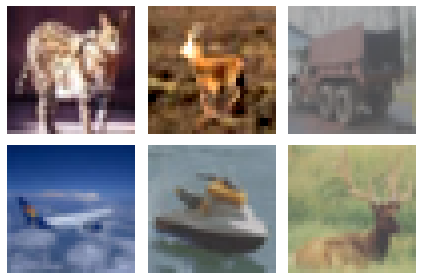

In [10]:
import pandas as pd
from scipy import stats
from scipy.spatial import distance
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt

# Computing M
lamdas = [10,100,1000]

for lamda in lamdas:
    print()
    print()
    print()
    print()
    print("Results for lamda ", lamda)
    print()
    k = 400 #int(Z.shape[1]*0.05) # % of original number of features
    n = Z.shape[0]
    delta_Z_matrix = np.absolute((Z[:int(len(train_contrast_labels)/2),:] - Z[int(len(train_contrast_labels)/2):,:]))
    M = - Z.T @ Z/n + lamda * delta_Z_matrix.T @ delta_Z_matrix / (n // 2 ) 


    # Computing the term on which we perform SVD
    alpha_alpha_T = contrast_coefficients @ contrast_coefficients.T
    d = alpha_alpha_T.shape[0]
    I = np.identity(d)
    I_minus_alpa_alpha_T = I-alpha_alpha_T
    term_for_SVD = (I_minus_alpa_alpha_T @ M) @ I_minus_alpa_alpha_T


    # Performing SVD to get eigenvectors and eigenvalues
    from numpy import linalg as LA
    eigenvalues, eigenvectors = LA.eigh(term_for_SVD)

    # Forming L from eigenvectors and alpha
    L_1 = contrast_coefficients
    least_k_eigen_values = eigenvalues[:k]
    least_k_eigen_values[np.absolute(least_k_eigen_values)<0.000001]=0

    non_zero_indeces = None
    if 0 in least_k_eigen_values:
        non_zero_indeces = np.nonzero(least_k_eigen_values)[0]
        least_k_eigen_values_without_0 = least_k_eigen_values[non_zero_indeces]

    else:
        non_zero_indeces = np.nonzero(least_k_eigen_values[:k-1])[0]
        least_k_eigen_values_without_0 = least_k_eigen_values[:k-1]

    L_2 = eigenvectors[:,non_zero_indeces]

    L = np.concatenate((L_1, L_2), axis=1)
    
    
    
    
    
    
   
    # Obtaining F_test values from extracted image features using numpy's linalg.lstsq function.
    F_4 = torch.from_numpy(np.linalg.lstsq(L, Z_4.transpose(), rcond=None)[0].transpose())
    F_4_first_col_removed = F_4[:,1:].detach().numpy()    
    
    for i in np.random.randint(0, 3999, size=5):
        # Calculating the distance between image at index i and all the other images. Distance is calculated 
        # using features in F
        print("Distances for image at index ", i)
        distances = distance.cdist(F_4_first_col_removed, F_4_first_col_removed[i].reshape(1,-1), 'euclidean').flatten()
        sorted_distance_indeces = np.argsort(distances) 
        print("Sorted distance indeces")
        print(sorted_distance_indeces[:6])
        print("Sorted distances")
        print(distances[sorted_distance_indeces[:6]])
        
        # Plotting first six images closest (distance-wise) to image at index i
        print("Images closest to image at index ", i)
        fig, axs = plt.subplots(2, 3, sharex=True, sharey=True)
        axs[0,0].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces[0]], cmap='gray')
        axs[0,0].set_axis_off()
        axs[0,1].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces[1]], cmap='gray')
        axs[0,1].set_axis_off()
        axs[0,2].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces[2]], cmap='gray')
        axs[0,2].set_axis_off()
        axs[1,0].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces[3]], cmap='gray')
        axs[1,0].set_axis_off()
        axs[1,1].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces[4]], cmap='gray')
        axs[1,1].set_axis_off()
        axs[1,2].imshow(original_and_3_diff_contrasts_of_images[sorted_distance_indeces[5]], cmap='gray')
        axs[1,2].set_axis_off()
        fig.set_tight_layout(True)
        plt.show()

#     break